In [361]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

Mental Health Treatment Prediction
Given data about the mental health of employee in the tech industry,let's try to predict wehther a 
given subject has sough treatment in the past.
# We will use a Tensorflow ANN to make our prediction

In [362]:
#loading the dataset
df=pd.read_csv('../input/mental-health-in-tech-survey/survey.csv')
#showing the dataset
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


# Cleaning the Dataset

In [363]:
#checking for the missing value
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [364]:
#checking for the mean to get 
#the percent of missing values
df.isna().mean()

Timestamp                    0.000000
Age                          0.000000
Gender                       0.000000
Country                      0.000000
state                        0.409055
self_employed                0.014297
family_history               0.000000
treatment                    0.000000
work_interfere               0.209690
no_employees                 0.000000
remote_work                  0.000000
tech_company                 0.000000
benefits                     0.000000
care_options                 0.000000
wellness_program             0.000000
seek_help                    0.000000
anonymity                    0.000000
leave                        0.000000
mental_health_consequence    0.000000
phys_health_consequence      0.000000
coworkers                    0.000000
supervisor                   0.000000
mental_health_interview      0.000000
phys_health_interview        0.000000
mental_vs_physical           0.000000
obs_consequence              0.000000
comments    

In [365]:
#dropping the comments column
#due to high percent of missing value
df=df.drop('comments',axis=1)

In [366]:
df['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [367]:
df['self_employed'].mode()

0    No
dtype: object

In [368]:
#filling self_employed column with mode of that 
#column
df['self_employed']=df['self_employed'].fillna('No')

In [369]:
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [370]:
df["work_interfere"].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [371]:
df['work_interfere'].mode()

0    Sometimes
dtype: object

In [372]:
#filling the missing value with the mode of that column
df['work_interfere']=df['work_interfere'].fillna('Sometimes')

In [373]:
#checking for unique value in the columns
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes'], dtype=object)

In [374]:
#converting date colum to year month day hour minute and second columns
df['Year']=df['Timestamp'].apply(lambda x:np.int(x[0:4]))
df['Month']=df['Timestamp'].apply(lambda x:np.int(x[5:7]))
df['Day']=df['Timestamp'].apply(lambda x:np.int(x[8:10]))
df['Hour']=df['Timestamp'].apply(lambda x:np.int(x[11:13]))
df['Minute']=df['Timestamp'].apply(lambda x:np.int(x[14:16]))
df['Second']=df['Timestamp'].apply(lambda x:np.int(x[17:19]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

In [375]:
#dropping the timestamp column after extracing
#date component and creating new column from it
df=df.drop('Timestamp',axis=1)

In [376]:
#checking for object column
{column:len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Gender': 49,
 'Country': 48,
 'state': 46,
 'self_employed': 2,
 'family_history': 2,
 'treatment': 2,
 'work_interfere': 4,
 'no_employees': 6,
 'remote_work': 2,
 'tech_company': 2,
 'benefits': 3,
 'care_options': 3,
 'wellness_program': 3,
 'seek_help': 3,
 'anonymity': 3,
 'leave': 5,
 'mental_health_consequence': 3,
 'phys_health_consequence': 3,
 'coworkers': 3,
 'supervisor': 3,
 'mental_health_interview': 3,
 'phys_health_interview': 3,
 'mental_vs_physical': 3,
 'obs_consequence': 2}

In [377]:
df["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [378]:
#creating function to encode Gender column
def encode_gender(x):
    if x.lower()[0]=='f':
        return 0
    if x.lower()[0]=='m':
        return 1
    else:
        return 2

In [379]:
df['Gender']=df['Gender'].apply(encode_gender)

In [380]:
df['Gender']

0       0
1       1
2       1
3       1
4       1
       ..
1254    1
1255    1
1256    1
1257    0
1258    1
Name: Gender, Length: 1259, dtype: int64

In [381]:
target='treatment'
binary_features=['self_employed','family_history',
                'remote_work','tech_company',
                 'phys_health_consequence',
                'obs_consequence']
ordinal_features=['work_interfere',
                 'no_employees']
nominal_features=['Country','state',
                  'phys_health_interview',
                 'benefits',
                 'care_options',
                 'wellness_program',
                 'seek_help',
                 'anonymity',
                 'leave',
                 'mental_health_consequence',
                 'coworkers',
                 'supervisor',
                 'mental_health_interview',
                 'mental_vs_physical']

In [382]:
df['mental_vs_physical']

0              Yes
1       Don't know
2               No
3               No
4       Don't know
           ...    
1254    Don't know
1255           Yes
1256            No
1257            No
1258    Don't know
Name: mental_vs_physical, Length: 1259, dtype: object

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   int64 
 2   Country                    1259 non-null   object
 3   state                      744 non-null    object
 4   self_employed              1259 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             1259 non-null   object
 8   no_employees               1259 non-null   object
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-null   object
 11  benefits                   1259 non-null   object
 12  care_options               1259 non-null   object
 13  wellness_program           1259 non-null   object
 14  seek_hel

In [384]:
#creating function to encode binary,ordinal,onehot
def binary_encode(df,columns,positive_values):
    df=df.copy()
    for column,positive_value in zip(columns,positive_values):
        df[column]=df[column].apply(lambda x:1 if x==positive_value else 0)
    return df
def ordinal_encode(df,columns,orderings):
    df=df.copy()
    for column,ordering in zip(columns,orderings):
        df[column]=df[column].apply(lambda x:ordering.index(x))
    return df
        
def onehot_encode(df,columns,prefixes):
    df=df.copy()
    for column,prefix in zip(columns,prefixes):
        dummies=pd.get_dummies(df[column],prefix=prefix)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [385]:
binary_positive_values=['Yes' for feature in binary_features]

In [386]:
binary_positive_values

['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']

In [387]:
ordinal_orderings=[[
    'Never','Rarely','Sometimes','Often'],[
    '1-5','6-25','26-100','100-500','500-1000',
    'More than 1000'
]]

In [388]:
nominal_prefixes=[
    'co',
    'st',
    're',
    'be',
    'ca',
    'we',
    'se',
    'an',
    'le',
    'mc',
    'ph',
    'cw',
    'su',
    'mi',
    'pi',
    'mp'
]

In [389]:
#applying function
df=binary_encode(
df,columns=binary_features,
positive_values=binary_positive_values)

In [390]:
df

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,Month,Day,Hour,Minute,Second
0,37,0,United States,IL,0,0,Yes,Often,6-25,0,1,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,0,Some of them,Yes,No,Maybe,Yes,0,2014,8,27,11,29,31
1,44,1,United States,IN,0,0,No,Rarely,More than 1000,0,0,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,0,No,No,No,No,Don't know,0,2014,8,27,11,29,37
2,32,1,Canada,NaN,0,0,No,Rarely,6-25,0,1,No,No,No,No,Don't know,Somewhat difficult,No,0,Yes,Yes,Yes,Yes,No,0,2014,8,27,11,29,44
3,31,1,United Kingdom,NaN,0,1,Yes,Often,26-100,0,1,No,Yes,No,No,No,Somewhat difficult,Yes,1,Some of them,No,Maybe,Maybe,No,1,2014,8,27,11,29,46
4,31,1,United States,TX,0,0,No,Never,100-500,1,1,Yes,No,Don't know,Don't know,Don't know,Don't know,No,0,Some of them,Yes,Yes,Yes,Don't know,0,2014,8,27,11,30,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,United Kingdom,NaN,0,0,Yes,Sometimes,26-100,0,1,No,No,No,No,Don't know,Somewhat easy,No,0,Some of them,Some of them,No,No,Don't know,0,2015,9,12,11,17,21
1255,32,1,United States,IL,0,1,Yes,Often,26-100,1,1,Yes,Yes,No,No,Yes,Somewhat difficult,No,0,Some of them,Yes,No,No,Yes,0,2015,9,26,1,7,35
1256,34,1,United States,CA,0,1,Yes,Sometimes,More than 1000,0,1,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,1,No,No,No,No,No,0,2015,11,7,12,36,58
1257,46,0,United States,NC,0,0,No,Sometimes,100-500,1,1,No,Yes,No,No,Don't know,Don't know,Yes,0,No,No,No,No,No,0,2015,11,30,21,25,6


In [391]:
#apply ordinal function to a datset
df=ordinal_encode(
df,
columns=ordinal_features,
orderings=ordinal_orderings)


In [392]:
df=onehot_encode(
df,
columns=nominal_features,
prefixes=nominal_prefixes)

In [393]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,phys_health_consequence,obs_consequence,Year,Month,Day,Hour,Minute,Second,co_Australia,co_Austria,"co_Bahamas, The",co_Belgium,co_Bosnia and Herzegovina,co_Brazil,co_Bulgaria,co_Canada,co_China,co_Colombia,co_Costa Rica,co_Croatia,co_Czech Republic,co_Denmark,co_Finland,co_France,co_Georgia,co_Germany,co_Greece,co_Hungary,co_India,co_Ireland,co_Israel,co_Italy,co_Japan,co_Latvia,co_Mexico,co_Moldova,co_Netherlands,co_New Zealand,co_Nigeria,co_Norway,co_Philippines,co_Poland,co_Portugal,co_Romania,co_Russia,co_Singapore,co_Slovenia,co_South Africa,co_Spain,co_Sweden,co_Switzerland,co_Thailand,co_United Kingdom,co_United States,co_Uruguay,co_Zimbabwe,st_AL,st_AZ,st_CA,st_CO,st_CT,st_DC,st_FL,st_GA,st_IA,st_ID,st_IL,st_IN,st_KS,st_KY,st_LA,st_MA,st_MD,st_ME,st_MI,st_MN,st_MO,st_MS,st_NC,st_NE,st_NH,st_NJ,st_NM,st_NV,st_NY,st_OH,st_OK,st_OR,st_PA,st_RI,st_SC,st_SD,st_TN,st_TX,st_UT,st_VA,st_VT,st_WA,st_WI,st_WV,st_WY,re_Maybe,re_No,re_Yes,be_Don't know,be_No,be_Yes,ca_No,ca_Not sure,ca_Yes,we_Don't know,we_No,we_Yes,se_Don't know,se_No,se_Yes,an_Don't know,an_No,an_Yes,le_Don't know,le_Somewhat difficult,le_Somewhat easy,le_Very difficult,le_Very easy,mc_Maybe,mc_No,mc_Yes,ph_No,ph_Some of them,ph_Yes,cw_No,cw_Some of them,cw_Yes,su_Maybe,su_No,su_Yes,mi_Don't know,mi_No,mi_Yes
0,37,0,0,0,Yes,3,1,0,1,0,0,2014,8,27,11,29,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
1,44,1,0,0,No,1,5,0,0,0,0,2014,8,27,11,29,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,32,1,0,0,No,1,1,0,1,0,0,2014,8,27,11,29,44,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
3,31,1,0,1,Yes,3,2,0,1,1,1,2014,8,27,11,29,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0
4,31,1,0,0,No,0,3,1,1,0,0,2014,8,27,11,30,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,Yes,2,2,0,1,0,0,2015,9,12,11,17,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
1255,32,1,0,1,Yes,3,2,1,1,0,0,2015,9,26,1,7,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [394]:
#encoding label columns
df=binary_encode(df,columns=['treatment'],positive_values='Yes')

In [395]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,phys_health_consequence,obs_consequence,Year,Month,Day,Hour,Minute,Second,co_Australia,co_Austria,"co_Bahamas, The",co_Belgium,co_Bosnia and Herzegovina,co_Brazil,co_Bulgaria,co_Canada,co_China,co_Colombia,co_Costa Rica,co_Croatia,co_Czech Republic,co_Denmark,co_Finland,co_France,co_Georgia,co_Germany,co_Greece,co_Hungary,co_India,co_Ireland,co_Israel,co_Italy,co_Japan,co_Latvia,co_Mexico,co_Moldova,co_Netherlands,co_New Zealand,co_Nigeria,co_Norway,co_Philippines,co_Poland,co_Portugal,co_Romania,co_Russia,co_Singapore,co_Slovenia,co_South Africa,co_Spain,co_Sweden,co_Switzerland,co_Thailand,co_United Kingdom,co_United States,co_Uruguay,co_Zimbabwe,st_AL,st_AZ,st_CA,st_CO,st_CT,st_DC,st_FL,st_GA,st_IA,st_ID,st_IL,st_IN,st_KS,st_KY,st_LA,st_MA,st_MD,st_ME,st_MI,st_MN,st_MO,st_MS,st_NC,st_NE,st_NH,st_NJ,st_NM,st_NV,st_NY,st_OH,st_OK,st_OR,st_PA,st_RI,st_SC,st_SD,st_TN,st_TX,st_UT,st_VA,st_VT,st_WA,st_WI,st_WV,st_WY,re_Maybe,re_No,re_Yes,be_Don't know,be_No,be_Yes,ca_No,ca_Not sure,ca_Yes,we_Don't know,we_No,we_Yes,se_Don't know,se_No,se_Yes,an_Don't know,an_No,an_Yes,le_Don't know,le_Somewhat difficult,le_Somewhat easy,le_Very difficult,le_Very easy,mc_Maybe,mc_No,mc_Yes,ph_No,ph_Some of them,ph_Yes,cw_No,cw_Some of them,cw_Yes,su_Maybe,su_No,su_Yes,mi_Don't know,mi_No,mi_Yes
0,37,0,0,0,0,3,1,0,1,0,0,2014,8,27,11,29,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
1,44,1,0,0,0,1,5,0,0,0,0,2014,8,27,11,29,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,32,1,0,0,0,1,1,0,1,0,0,2014,8,27,11,29,44,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
3,31,1,0,1,0,3,2,0,1,1,1,2014,8,27,11,29,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0
4,31,1,0,0,0,0,3,1,1,0,0,2014,8,27,11,30,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,0,2,2,0,1,0,0,2015,9,12,11,17,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
1255,32,1,0,1,0,3,2,1,1,0,0,2015,9,26,1,7,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [396]:
print('Remaining Missing Values',df.isna().sum().sum())

Remaining Missing Values 0


# Splitting and Scaling the dataset


In [397]:
#label column
y=df['treatment'].copy()
#feature column
x=df.drop('treatment',axis=1).copy()


In [398]:
x

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,phys_health_consequence,obs_consequence,Year,Month,Day,Hour,Minute,Second,co_Australia,co_Austria,"co_Bahamas, The",co_Belgium,co_Bosnia and Herzegovina,co_Brazil,co_Bulgaria,co_Canada,co_China,co_Colombia,co_Costa Rica,co_Croatia,co_Czech Republic,co_Denmark,co_Finland,co_France,co_Georgia,co_Germany,co_Greece,co_Hungary,co_India,co_Ireland,co_Israel,co_Italy,co_Japan,co_Latvia,co_Mexico,co_Moldova,co_Netherlands,co_New Zealand,co_Nigeria,co_Norway,co_Philippines,co_Poland,co_Portugal,co_Romania,co_Russia,co_Singapore,co_Slovenia,co_South Africa,co_Spain,co_Sweden,co_Switzerland,co_Thailand,co_United Kingdom,co_United States,co_Uruguay,co_Zimbabwe,st_AL,st_AZ,st_CA,st_CO,st_CT,st_DC,st_FL,st_GA,st_IA,st_ID,st_IL,st_IN,st_KS,st_KY,st_LA,st_MA,st_MD,st_ME,st_MI,st_MN,st_MO,st_MS,st_NC,st_NE,st_NH,st_NJ,st_NM,st_NV,st_NY,st_OH,st_OK,st_OR,st_PA,st_RI,st_SC,st_SD,st_TN,st_TX,st_UT,st_VA,st_VT,st_WA,st_WI,st_WV,st_WY,re_Maybe,re_No,re_Yes,be_Don't know,be_No,be_Yes,ca_No,ca_Not sure,ca_Yes,we_Don't know,we_No,we_Yes,se_Don't know,se_No,se_Yes,an_Don't know,an_No,an_Yes,le_Don't know,le_Somewhat difficult,le_Somewhat easy,le_Very difficult,le_Very easy,mc_Maybe,mc_No,mc_Yes,ph_No,ph_Some of them,ph_Yes,cw_No,cw_Some of them,cw_Yes,su_Maybe,su_No,su_Yes,mi_Don't know,mi_No,mi_Yes
0,37,0,0,0,3,1,0,1,0,0,2014,8,27,11,29,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
1,44,1,0,0,1,5,0,0,0,0,2014,8,27,11,29,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,32,1,0,0,1,1,0,1,0,0,2014,8,27,11,29,44,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
3,31,1,0,1,3,2,0,1,1,1,2014,8,27,11,29,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0
4,31,1,0,0,0,3,1,1,0,0,2014,8,27,11,30,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,2,2,0,1,0,0,2015,9,12,11,17,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
1255,32,1,0,1,3,2,1,1,0,0,2015,9,26,1,7,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [399]:
#scaling the dataset
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [400]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

# Training the model

In [401]:
x_train.shape

(881, 147)

In [402]:
x.shape

(1259, 147)

In [403]:
#designing the tensorflow
inputs=tf.keras.Input(shape=(x.shape[1],))
x=tf.keras.layers.Dense(1024,activation='relu')(inputs)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(inputs,outputs)
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy',
                     tf.keras.metrics.AUC(name='auc')])
batch_size=64
epochs=50
history=model.fit(
x_train,
y_train,
validation_split=0.2,
batch_size=batch_size,
epochs=epochs,
callbacks=[
    tf.keras.callbacks.ReduceLROnPlateau()
])

Epoch 1/50
11/11 [==============================] - 1s 49ms/step - loss: 0.0796 - accuracy: 0.9261 - auc: 0.0000e+00 - val_loss: 4.3465e-07 - val_accuracy: 1.0000 - val_auc: 0.0000e+00
Epoch 2/50
11/11 [==============================] - 0s 16ms/step - loss: 2.0934e-07 - accuracy: 1.0000 - auc: 0.0000e+00 - val_loss: 6.9595e-09 - val_accuracy: 1.0000 - val_auc: 0.0000e+00
Epoch 3/50
11/11 [==============================] - 0s 15ms/step - loss: 8.1327e-09 - accuracy: 1.0000 - auc: 0.0000e+00 - val_loss: 1.5179e-09 - val_accuracy: 1.0000 - val_auc: 0.0000e+00
Epoch 4/50
11/11 [==============================] - 0s 15ms/step - loss: 2.9799e-09 - accuracy: 1.0000 - auc: 0.0000e+00 - val_loss: 8.7245e-10 - val_accuracy: 1.0000 - val_auc: 0.0000e+00
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 2.0883e-09 - accuracy: 1.0000 - auc: 0.0000e+00 - val_loss: 7.1682e-10 - val_accuracy: 1.0000 - val_auc: 0.0000e+00
Epoch 6/50
11/11 [==============================] - 0s 16ms

# Results

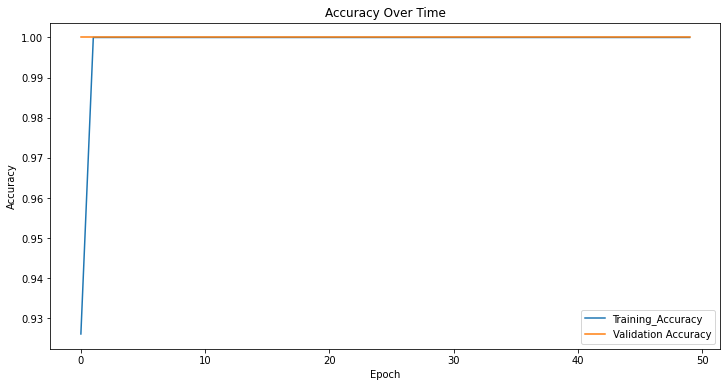

In [404]:
plt.figure(figsize=(12,6))
plt.plot(range(epochs),history.history['accuracy'],label='Training_Accuracy')
plt.plot(range(epochs),history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Time')
plt.show()


In [405]:
model.evaluate(x_test,y_test)

12/12 [==============================] - 0s 3ms/step - loss: 1.3276e-09 - accuracy: 1.0000 - auc: 0.0000e+00


[1.32764832461163e-09, 1.0, 0.0]